In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive/My Drive/Colab Notebooks/FastAI/Personal Challenges/COMPUTER VISION/Malaria Dataset/"

Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
tfms = get_transforms(flip_vert=True, max_warp=0, max_zoom=1.3, max_rotate=20)

In [8]:
data = (ImageList.from_folder(path)
        .random_split_by_pct(valid_pct=0.2)
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch())

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:203: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


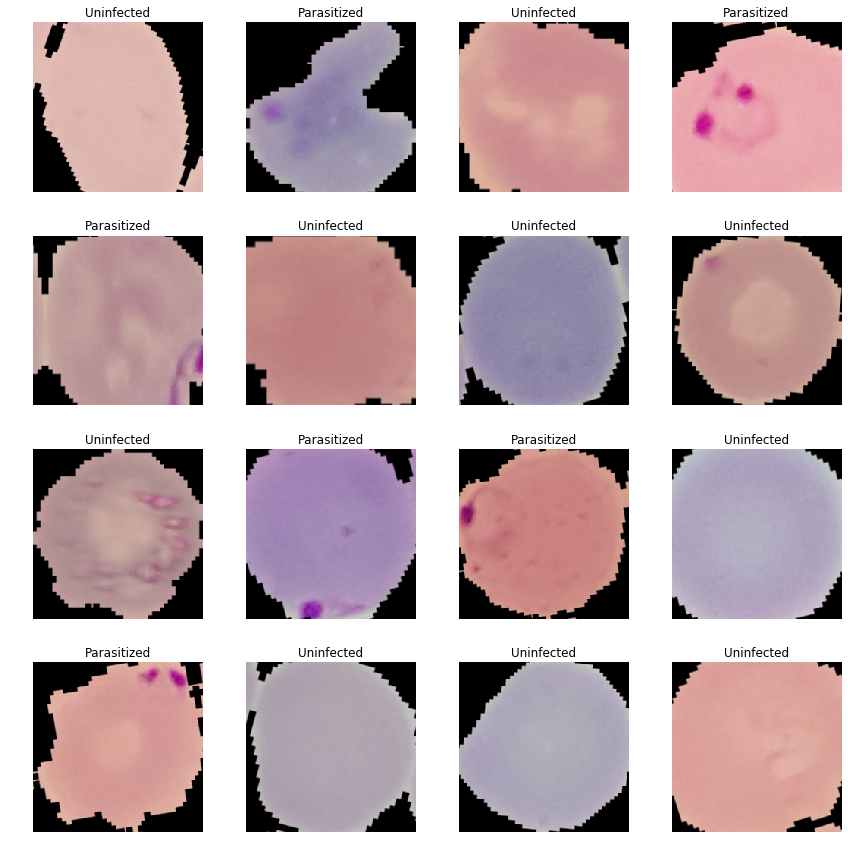

In [9]:
data.show_batch(rows=4, figsize=(12, 12))

In [11]:
print(data.classes)

['Parasitized', 'Uninfected']


In [10]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 98232489.07it/s]


In [0]:
learn.model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-03


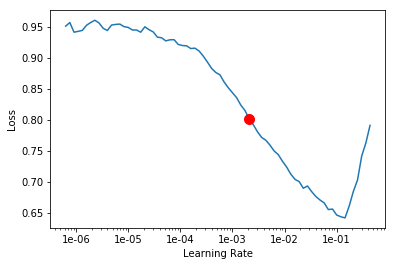

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.150341,0.106137,0.961810,05:44
1,0.158504,0.127821,0.954389,04:49
2,0.144931,0.090459,0.967783,04:55
3,0.126653,0.081347,0.970498,04:58
4,0.125719,0.077787,0.970498,04:54


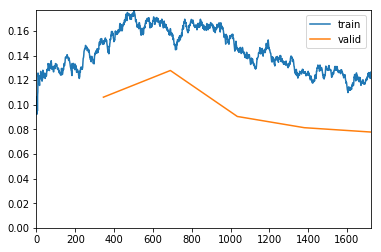

In [0]:
learn.fit_one_cycle(5, ((1e-2)*2))

In [0]:
learn.save(path + 'model1')

In [12]:
learn.load(path + 'model1')

Learner(data=ImageDataBunch;

Train: LabelList (22103 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Uninfected,Uninfected,Uninfected
Path: /content/gdrive/My Drive/Colab Notebooks/FastAI/Personal Challenges/COMPUTER VISION/Malaria Dataset;

Valid: LabelList (5525 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Uninfected,Parasitized,Parasitized,Uninfected
Path: /content/gdrive/My Drive/Colab Notebooks/FastAI/Personal Challenges/COMPUTER VISION/Malaria Dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mod

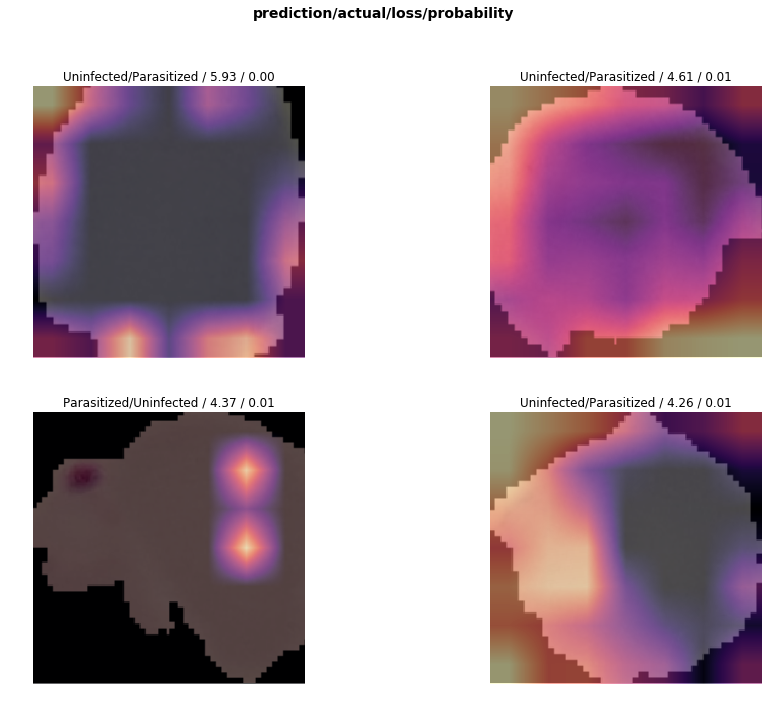

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

interp.plot_top_losses(4, figsize=(15,11))

In [14]:
interp.most_confused(min_val=2)

[('Parasitized', 'Uninfected', 90), ('Uninfected', 'Parasitized', 45)]

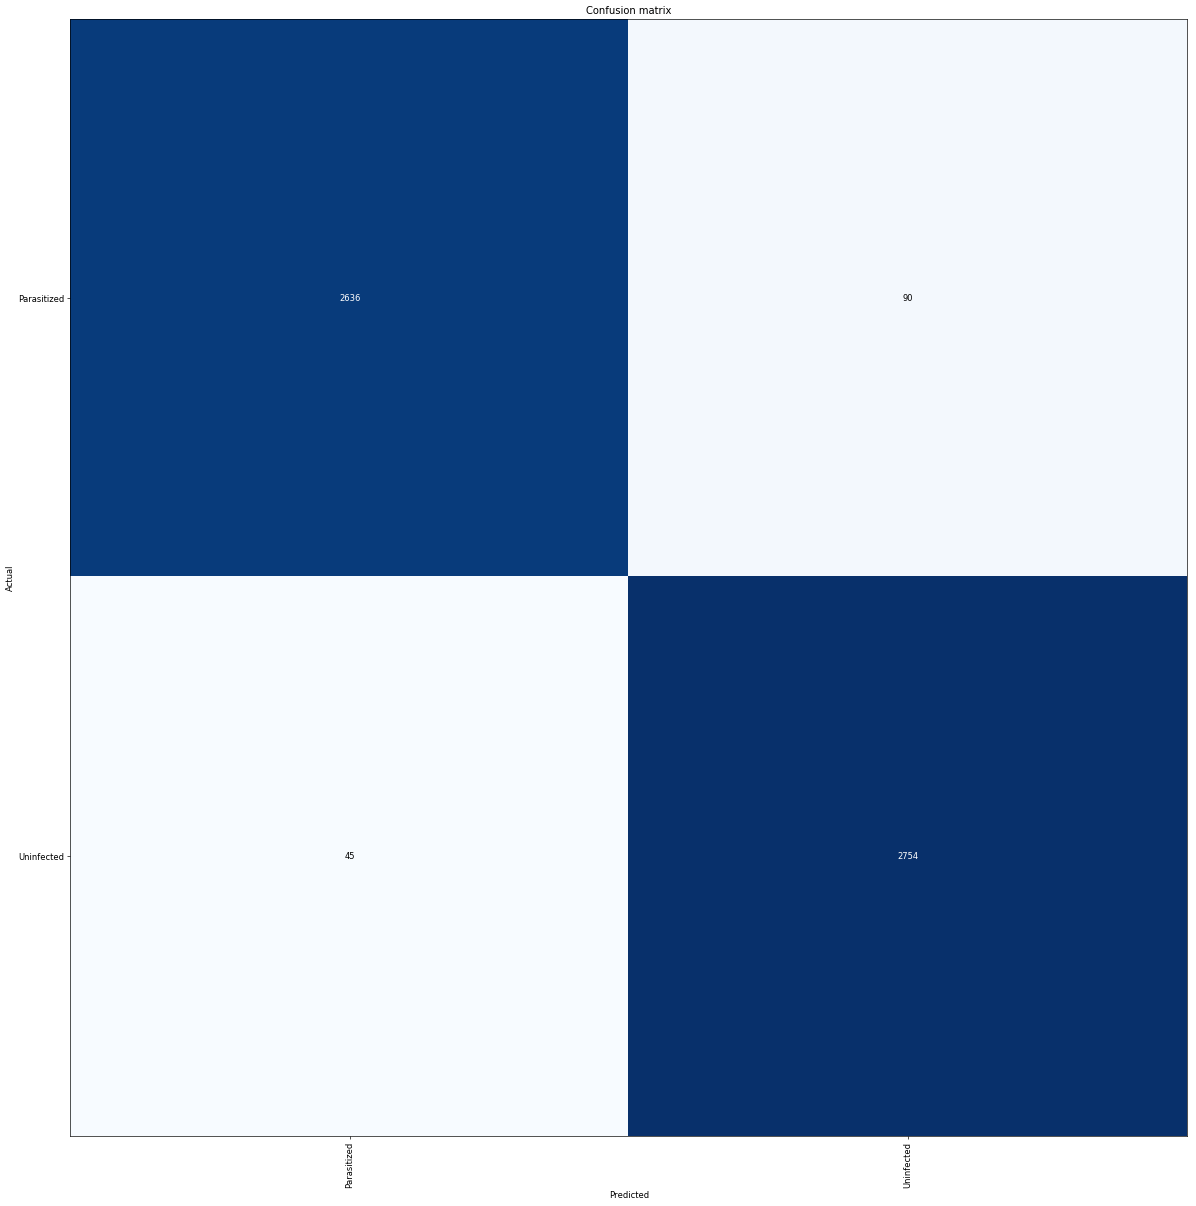

In [15]:
interp.plot_confusion_matrix(figsize=(20, 20), dpi=60)